# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

Імпортую бібліотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Зчитую дані з файлу у датафрейм


In [3]:
from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/clean_data3.csv" # я скачав Ваш файл, але змінив 2 на 3, щоб на диску зберігалася моя попередня копія і ця
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>ознака 1</li>
    <li>ознака 2</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [11]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
X1 = df[['Population']]
Y = df['CO2 emission']
lm1.fit(X1, Y)

Yhat=lm1.predict(X1)
Yhat[0:5]

array([166725.94304326,  13118.67670299, 195485.17184303,   -514.12828729,
         -409.32904311])

Знаходжу коефіцієнти моделі


In [12]:
lm1.intercept_

-782.8642515405954

In [13]:
lm1.coef_

array([0.00483347])

Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

<b>CO2 emission</b> = -782.86 + 0.005 x <b>Population</b>

Створюю об’єкт лінійної регресії та навчаю другу модель


In [14]:
lm2 = LinearRegression()
X2 = df[['Area']]
lm2.fit(X2, Y)

Yhat2=lm2.predict(X2)
Yhat2[0:5]

array([173940.73285816,  11993.5518378 , 622559.15320471,   4585.25519437,
         4655.31614336])

Знаходжу коефіцієнти моделі


In [15]:
lm2.intercept_

4533.3581951147935

In [16]:
lm2.coef_

array([0.259485])

Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


<b>CO2 emission</b> = 4533.36 + 0.26 x <b>Area</b>

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [52]:
lm3 = LinearRegression()
Z = df[['Population', 'Area']]
lm3.fit(Z, Y)
Yhat3=lm3.predict(Z)
Yhat3[0:5]

array([170679.08546   , -35889.3680186 , 408747.06980287, -50902.62624497,
       -50780.96521999])

Знаходжу коефіцієнти моделі


In [18]:
lm3.intercept_

-51153.70055281371

In [19]:
lm3.coef_

array([0.00407087, 0.12369062])

Підставляючи фактичні значення, маємо:

<b>CO2 emission</b> = -51153.7 + 0.004 x <b>Population</b> + 0.127 x <b>Area</b>


<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

Знаходжу коефіцієнти моделі


In [22]:
X31 = df['Population']
f1 = np.polyfit(X31, Y, 2)
p1 = np.poly1d(f1)
print(p1)

            2
-3.004e-13 x + 0.00521 x - 7948


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

Знаходжу коефіцієнти моделі


In [23]:
X32 = df['Area']
f2 = np.polyfit(X32, Y, 2)
p2 = np.poly1d(f2)
print(p2)

            2
-1.484e-08 x + 0.436 x - 4.963e+04


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Знаходжу коефіцієнти моделі


In [24]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

In [27]:
Z.shape

(217, 2)

In [29]:
Z_pr.shape

(217, 6)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([124239.84828601,  20888.35916174, 228284.74133694,  13805.56848437])

<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


(0.0, 11793246.85108933)

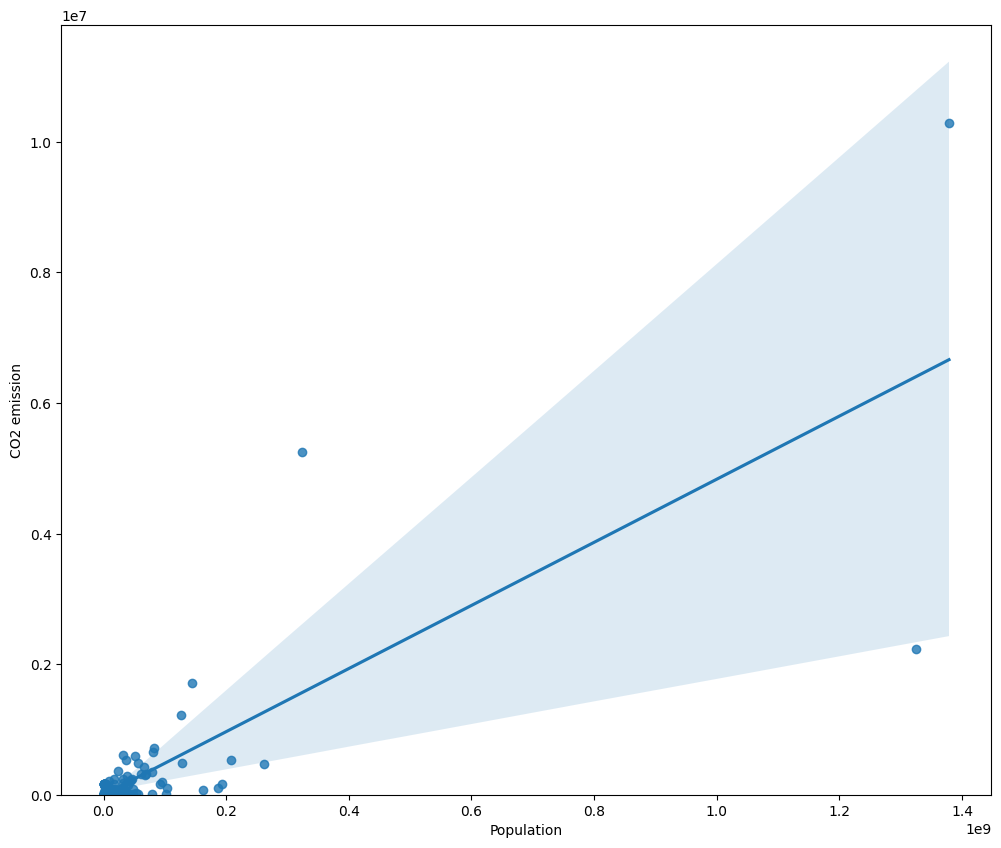

In [30]:
import seaborn as sns
%matplotlib inline
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)

(0.0, 10812197.372094527)

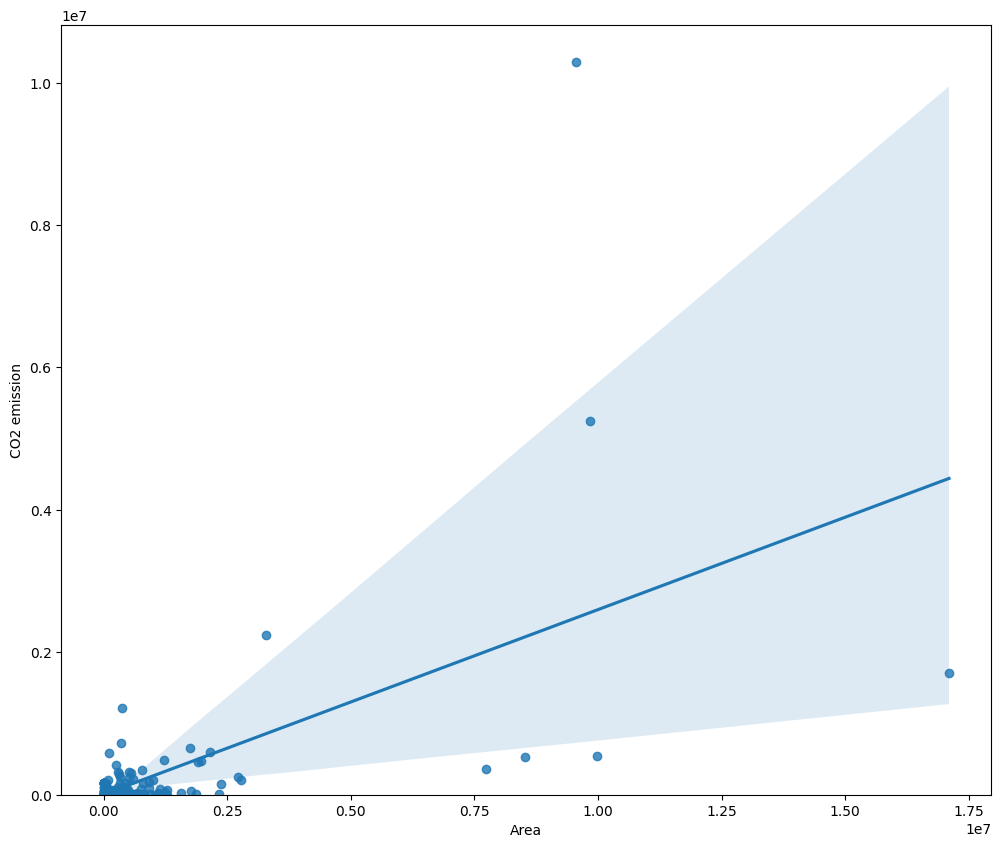

In [32]:
plt.figure(figsize=(width, height))
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)

Для візуалізації дисперсії даних використаю діаграми залишків.


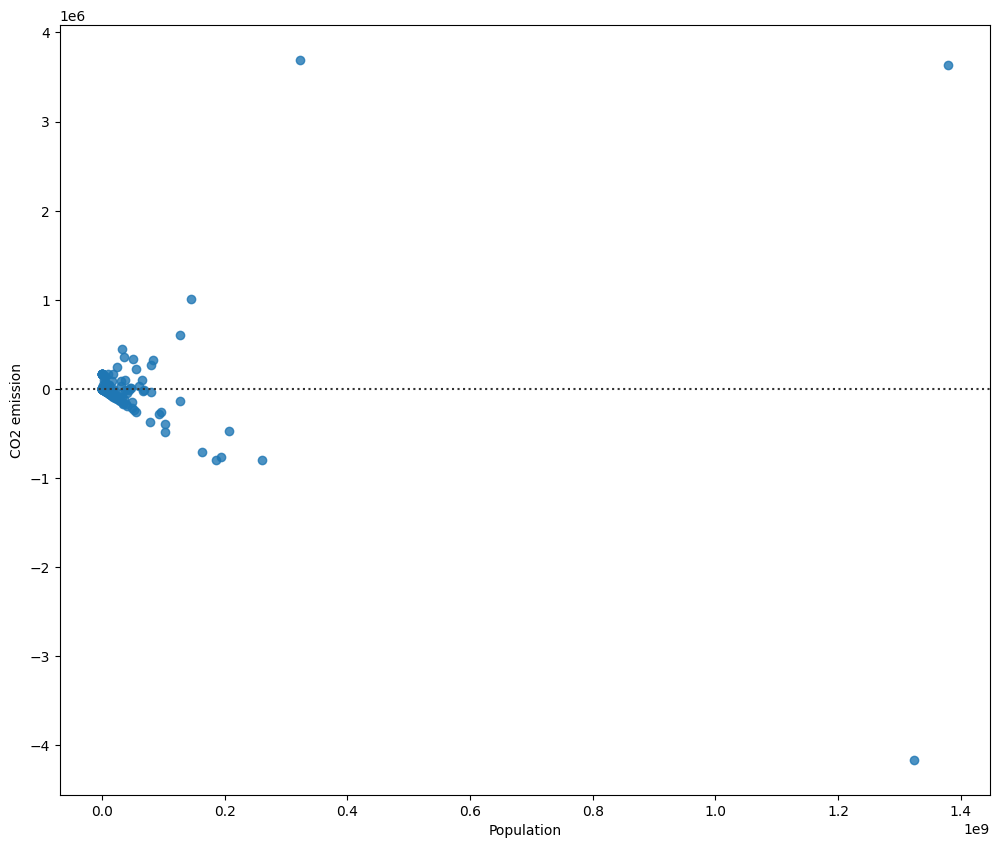

In [33]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['Population'], y=df['CO2 emission'])
plt.show()

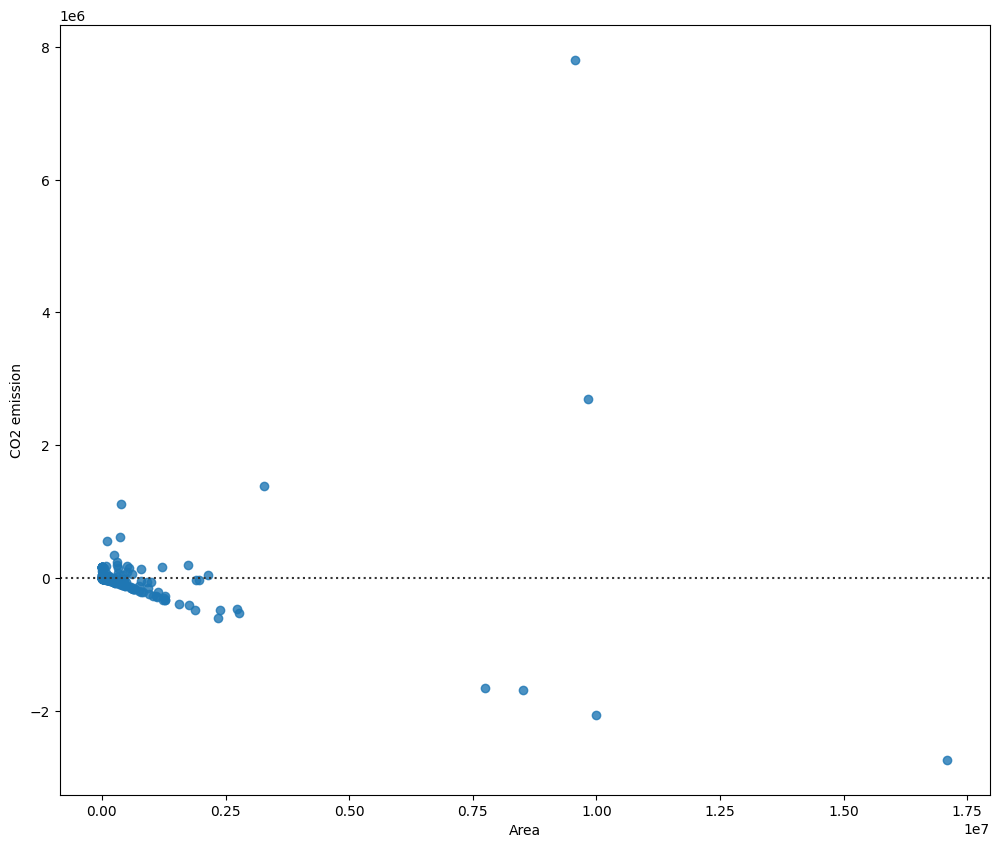

In [34]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['Area'], y=df['CO2 emission'])
plt.show()

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


<ipython-input-36-78622832d2c6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-36-78622832d2c6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted V

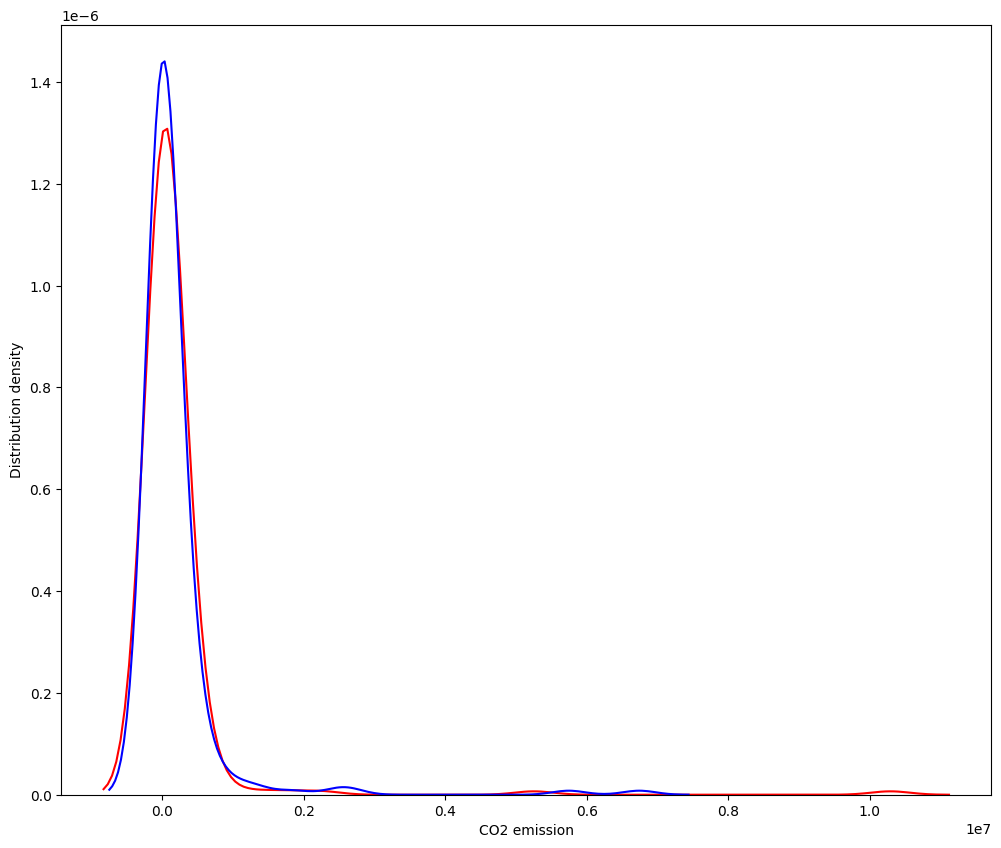

In [36]:
Y_hat = lm3.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.xlabel("CO2 emission")
plt.ylabel("Distribution density")

plt.show()
plt.close()

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>


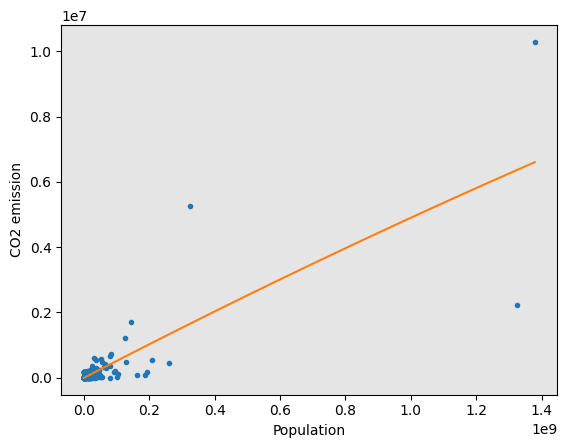

In [39]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    min_lv = min(independent_variable)
    max_lv = max(independent_variable)
    x_new = np.linspace(min_lv, max_lv, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("CO2 emission")

    plt.show()
    plt.close()

PlotPolly(p1, X31, Y, 'Population')

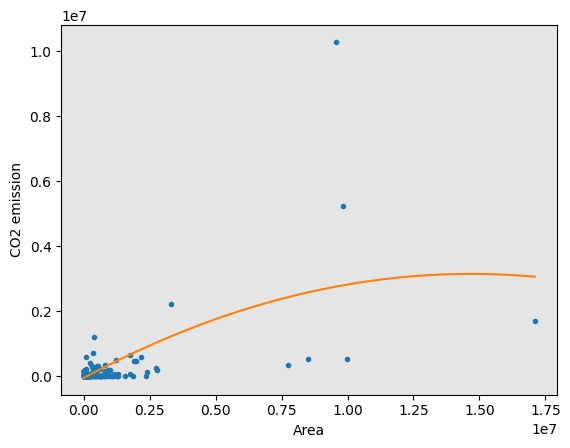

In [41]:
PlotPolly(p2, X32, Y, 'Area')

Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


<ipython-input-46-5fcba5350606>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
<ipython-input-46-5fcba5350606>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


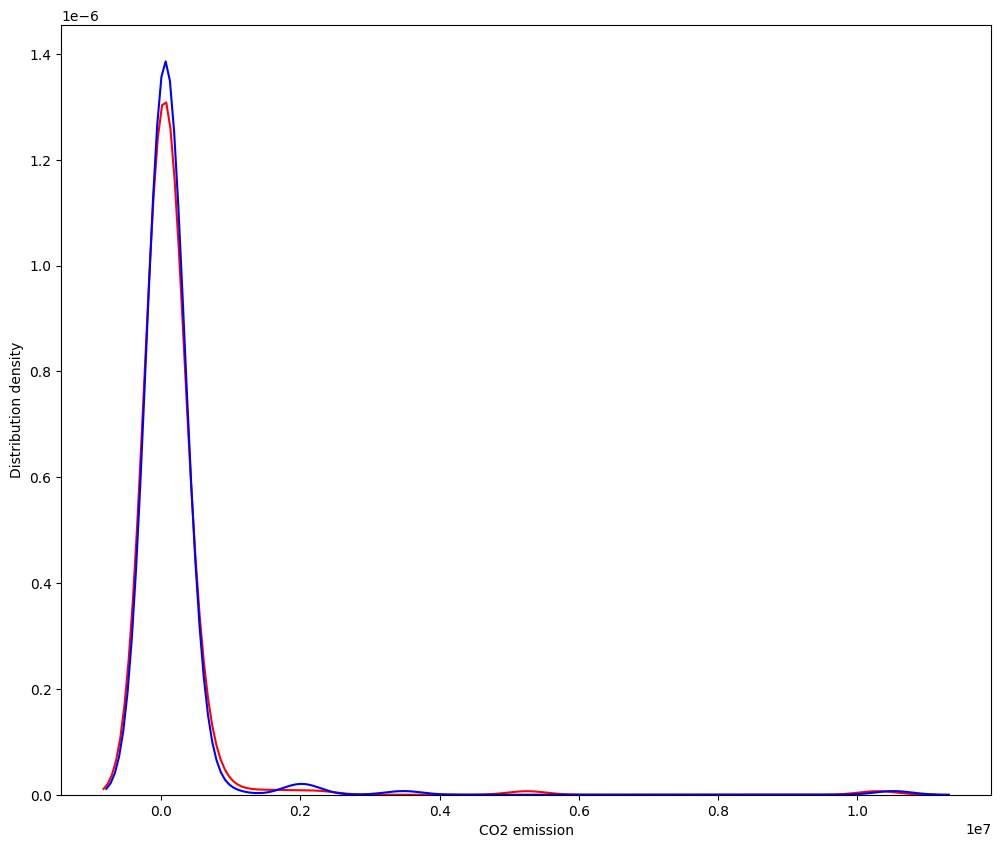

In [46]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.xlabel("CO2 emission")
plt.ylabel("Distribution density")

plt.show()
plt.close()

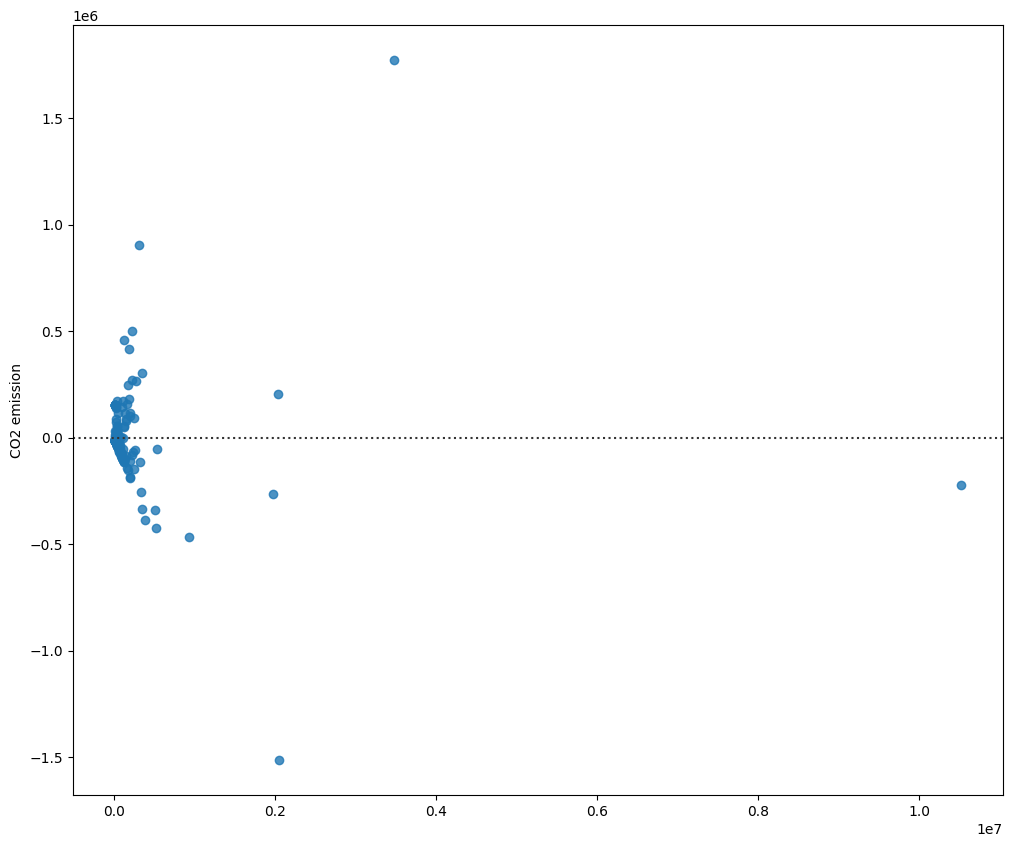

In [47]:
plt.figure(figsize=(width, height))
sns.residplot(x=ypipe, y=Y)
plt.show()

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


Модель 1:
$$
Yhat1 = a + b  X
$$


In [50]:
from sklearn.metrics import mean_squared_error
print('The R-square is: ', lm1.score(X1, Y))
mse1 = mean_squared_error(df['CO2 emission'], Yhat)
print('The mean square error is: ', mse1)

The R-square is:  0.6435755233131817
The mean square error is:  232801816739.9179


Модель 2:
$$
Yhat2 = a + b  X
$$

In [51]:
print('The R-square is: ', lm2.score(X2, Y))
mse2 = mean_squared_error(df['CO2 emission'], Yhat2)
print('The mean square error is: ', mse2)

The R-square is:  0.34282421100737426
The mean square error is:  429240211045.894


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [53]:
print('The R-square is: ', lm3.score(Z, Y))
mse3 = mean_squared_error(df['CO2 emission'], Yhat3)
print('The mean square error is: ', mse3)

The R-square is:  0.705452018011884
The mean square error is:  192386633940.86154


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [56]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

r_squared = r2_score(Y, p1(X31))
print('The R-square value is: ', r_squared)
mse4 = mean_squared_error(df['CO2 emission'], p1(X31))
print('The mean square error is: ', mse4)

The R-square value is:  0.643890609154327
The mean square error is:  232596015620.61905


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [57]:
r_squared = r2_score(Y, p2(X32))
print('The R-square value is: ', r_squared)
mse5 = mean_squared_error(df['CO2 emission'], p2(X32))
print('The mean square error is: ', mse5)

The R-square value is:  0.3698523918567882
The mean square error is:  411586514354.2175


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [58]:
print('The R-square is: ', pipe.score(Z, Y))
mse6 = mean_squared_error(df['CO2 emission'], ypipe)
print('The mean square error is: ', mse6)

The R-square is:  0.9359013231949626
The mean square error is:  41866620804.35464


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Polinomial Fit є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей.
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


In [89]:
Z = df[['Population', 'Area']]
Y = df['CO2 emission']

degrees = [1, 2, 3, 4, 5]
coefs = []
r2_scores = []
mse_scores = []

for degree in degrees:
  pr=PolynomialFeatures(degree=degree)
  Z_pr=pr.fit_transform(Z)
  lm = LinearRegression()
  lm.fit(Z_pr, Y)
  Yhat = lm.predict(Z_pr)
  r2 = r2_score(Y, Yhat)
  mse = mean_squared_error(Y, Yhat)

  coefs.append(lm.coef_)
  r2_scores.append(r2)
  mse_scores.append(mse)

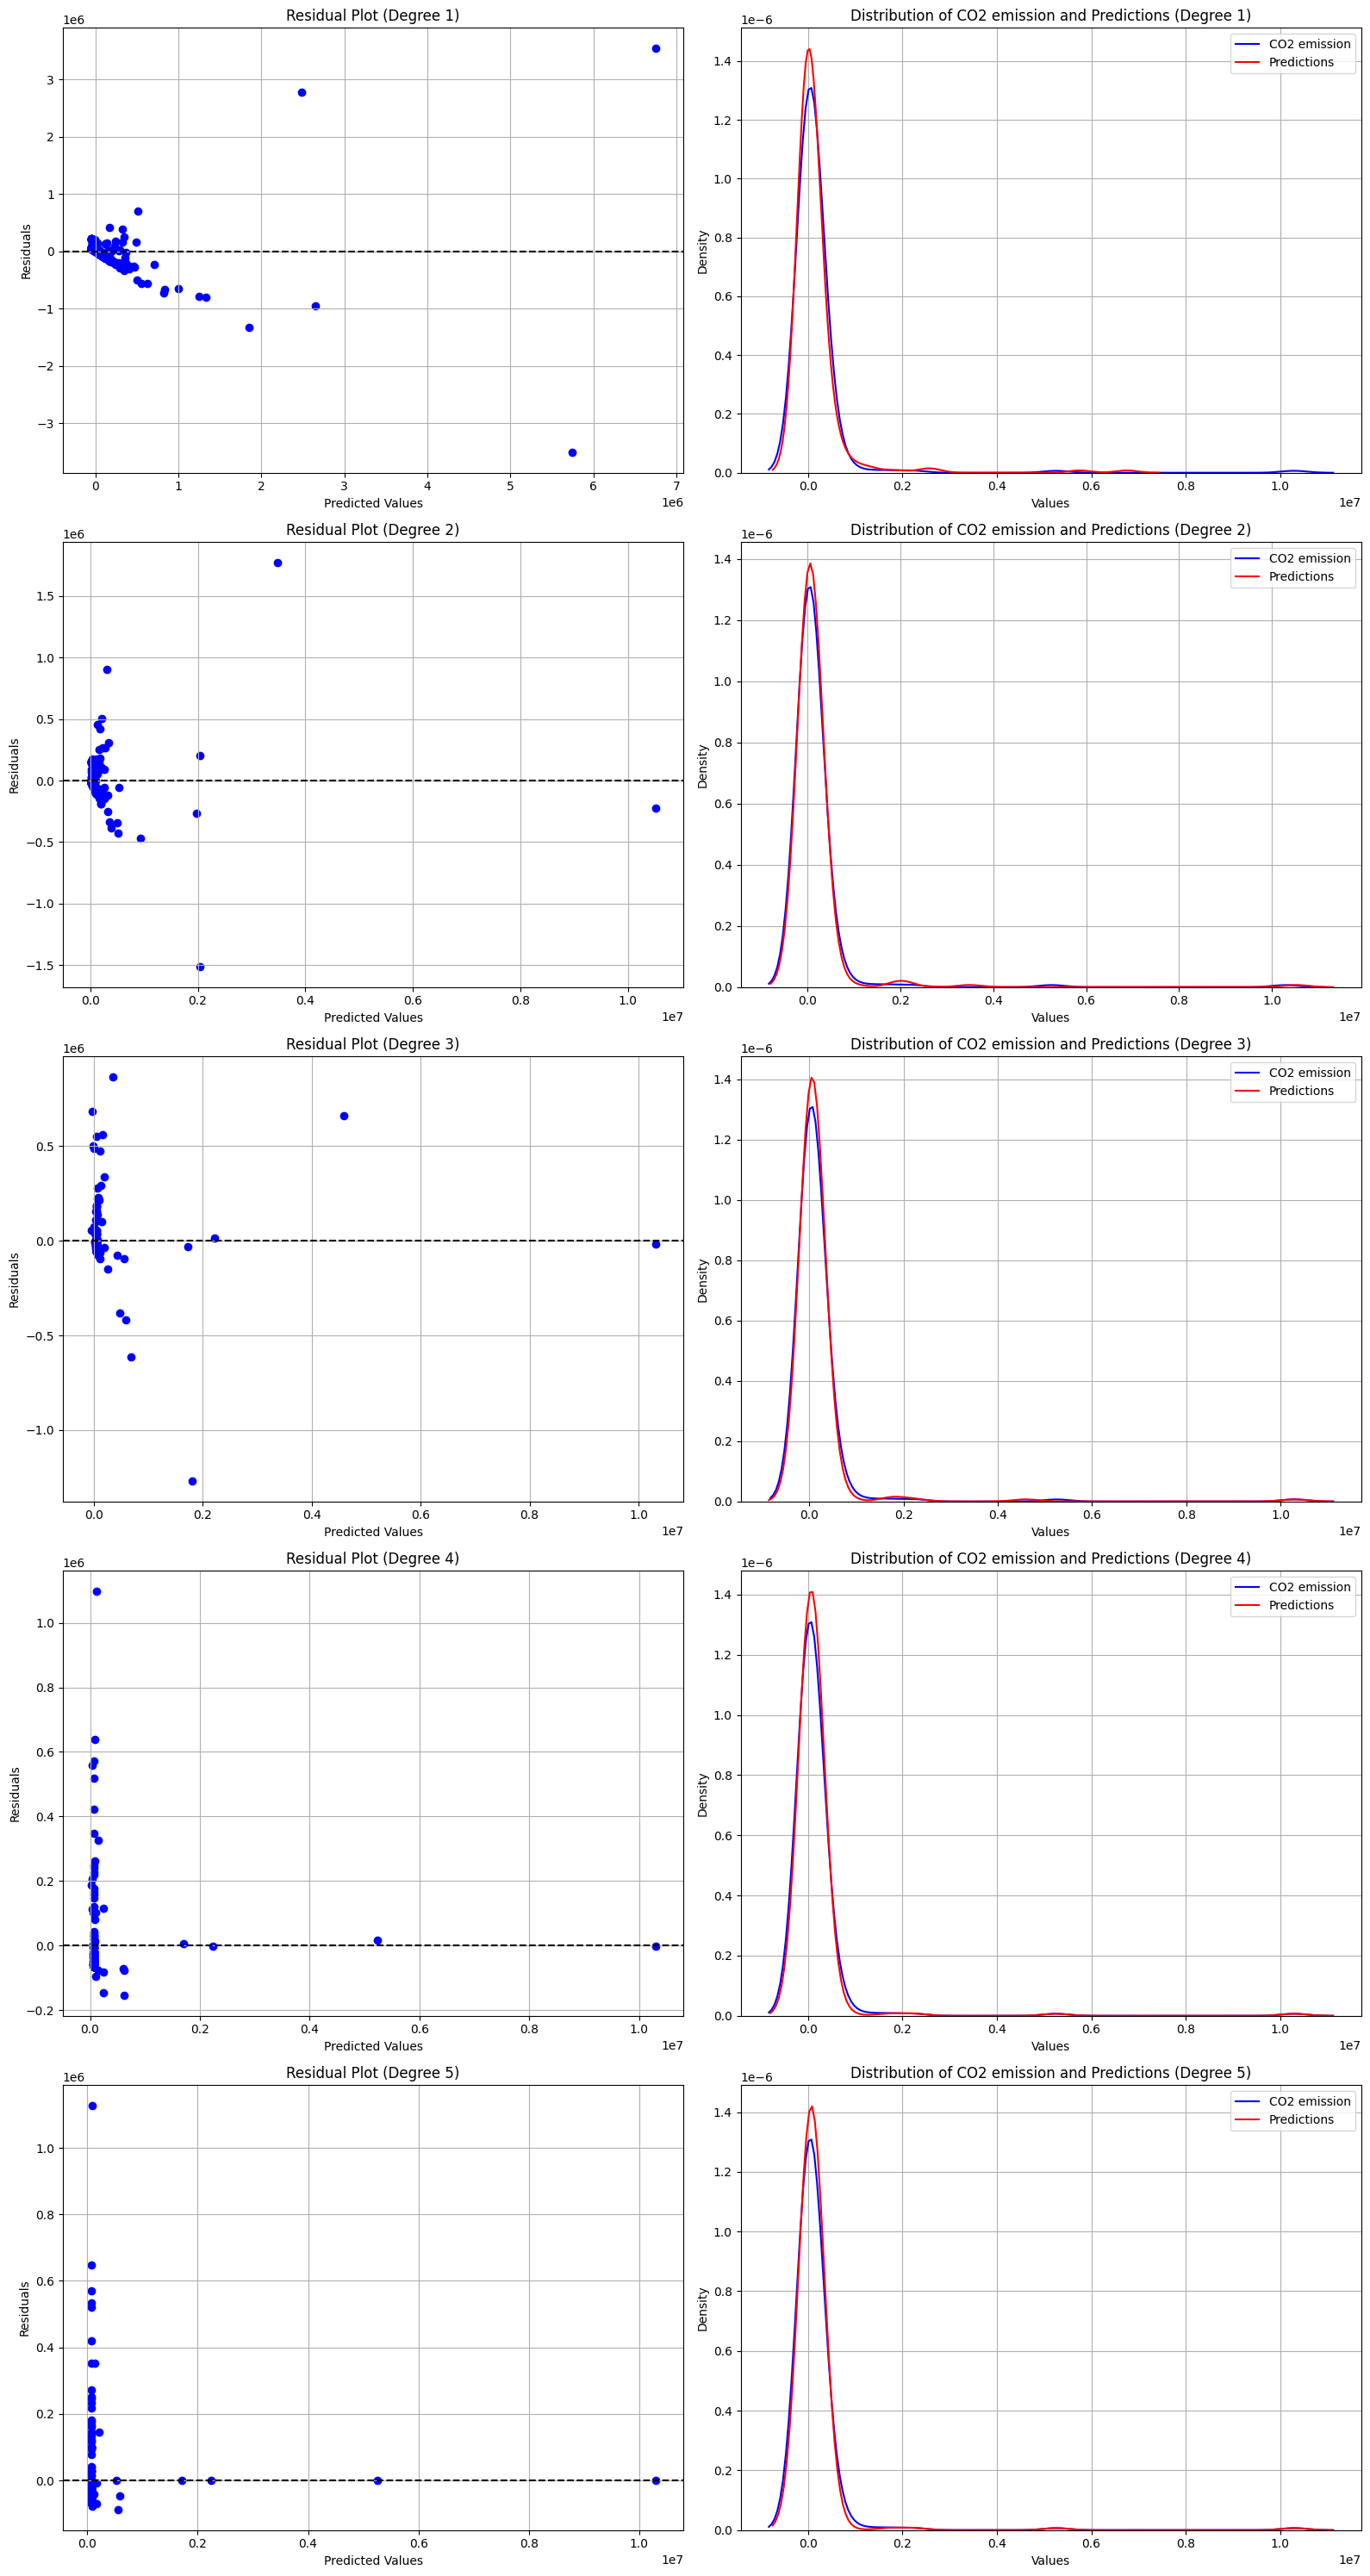

In [90]:
fig, axes = plt.subplots(len(degrees), 2, figsize=(16, 6*len(degrees)))

for i, degree in enumerate(degrees):
  pr=PolynomialFeatures(degree=degree)
  Z_pr=pr.fit_transform(Z)
  lm = LinearRegression()
  lm.fit(Z_pr, Y)
  Yhat = lm.predict(Z_pr)
  residuals = Y - Yhat

  ax1 = axes[i, 0]
  ax1.scatter(Yhat, residuals, color='blue')
  ax1.axhline(y=0, linestyle='--', color='black')
  ax1.set_title(f'Residual Plot (Degree {degree})')
  ax1.set_xlabel('Predicted Values')
  ax1.set_ylabel('Residuals')
  ax1.grid(True)

  ax2 = axes[i, 1]
  sns.kdeplot(Y, color='blue', label='CO2 emission', ax=ax2)
  sns.kdeplot(Yhat, color='red', label='Predictions', ax=ax2)
  ax2.set_title(f'Distribution of CO2 emission and Predictions (Degree {degree})')
  ax2.set_xlabel ('Values')
  ax2.set_ylabel('Density')
  ax2.legend()
  ax2.grid(True)

plt.tight_layout()
plt.show()

In [91]:
for i, degree in enumerate(degrees):
  print(f'Degree {degree} Polinomial Model:')
  print(f'R^2: {r2_scores[i]:.3f}')
  print(f'MSE: {mse_scores[i]:.2e}\n')

Degree 1 Polinomial Model:
R^2: 0.705
MSE: 1.92e+11

Degree 2 Polinomial Model:
R^2: 0.936
MSE: 4.19e+10

Degree 3 Polinomial Model:
R^2: 0.954
MSE: 3.02e+10

Degree 4 Polinomial Model:
R^2: 0.971
MSE: 1.92e+10

Degree 5 Polinomial Model:
R^2: 0.970
MSE: 1.93e+10



<h2>Виконав студент групи ІП-23<br>  Востріков Любомир</h2>